In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [53]:
def convert_to_float(value):
  try:
    return float(value.strip('%'))
  except ValueError:
    return float('NaN')

columns_with_percentage = ['SET', '1AM-GEM', 'KTB.BK', 'PTTEP.BK', 'TTB.BK', 'MEGA.BK','CPALL.BK','CENTEL.BK', 'MINT.BK', 'ADVANC.BK', 'HANA.BK', 'OSP.BK', 'Portfolio']

for col in columns_with_percentage:
  data[col] = data[col].apply(convert_to_float)

In [54]:
def createRegression(stock):
  X = data['SET'].values.reshape(-1, 1)
  Y = data[stock].values

  model = LinearRegression()
  model.fit(X, Y)
  Y_pred = model.predict(X)

  plt.scatter(X, Y, color='blue', label='Data points')
  plt.plot(X, Y_pred, color='red', label='Regression Analysis')
  plt.title(stock)
  plt.legend()

  slope = model.coef_[0]
  intercept = model.intercept_
  equation = f'y = {slope:.4f}x + {intercept:.4f}'

  plt.text(
    plt.xlim()[1] * 0.99, 
    plt.ylim()[1] * 1.08, 
    equation, 
    fontsize=10, 
    ha='right',
    bbox=dict(
      facecolor='none', 
      edgecolor='black',
      boxstyle='square,pad=0.2'
    )
  )

  plt.show()

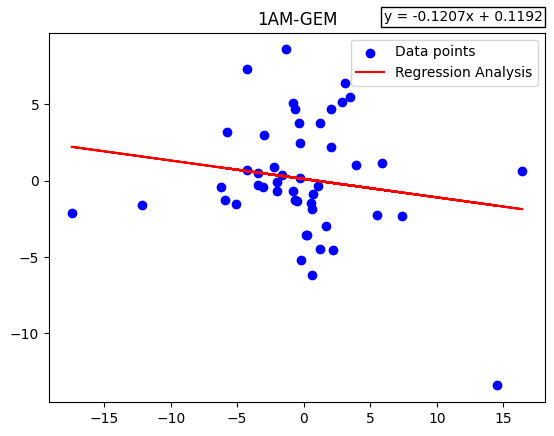

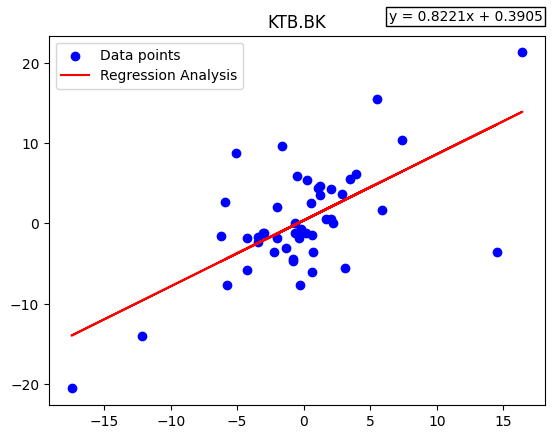

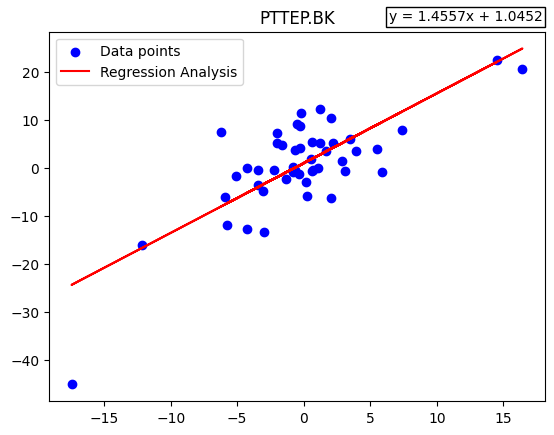

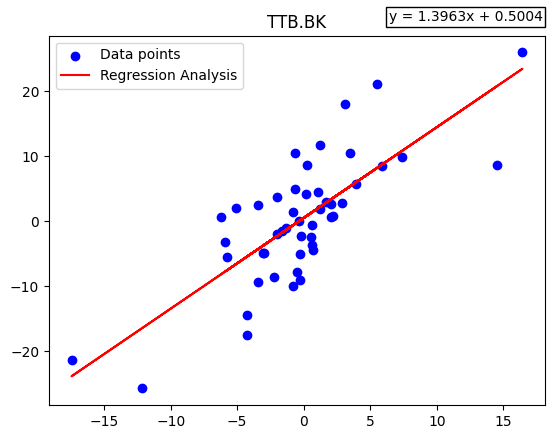

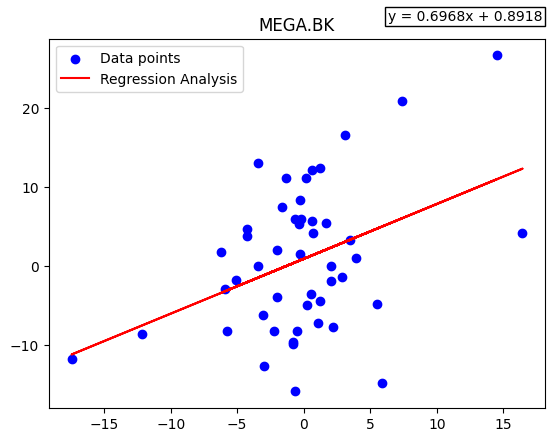

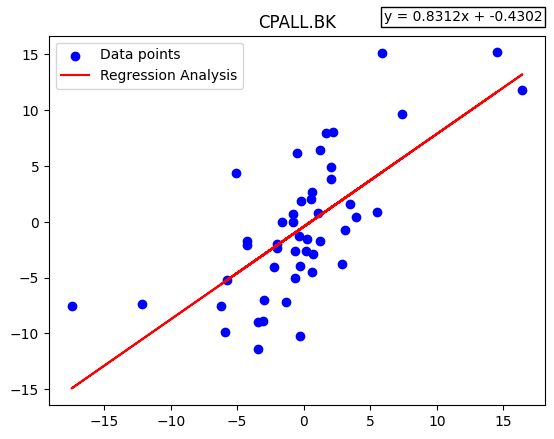

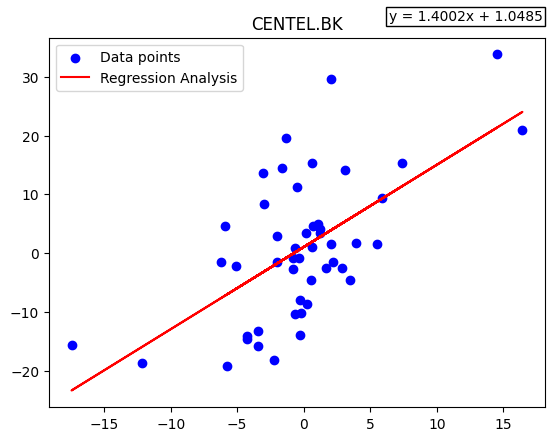

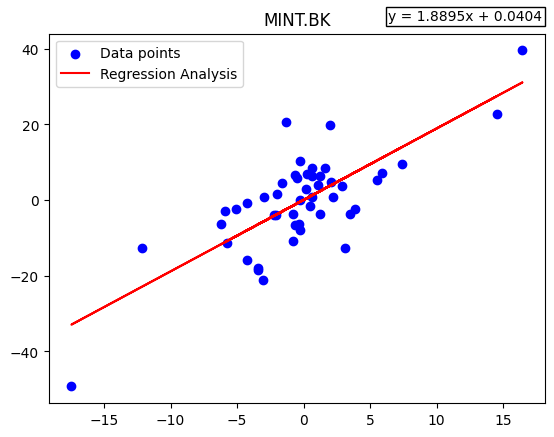

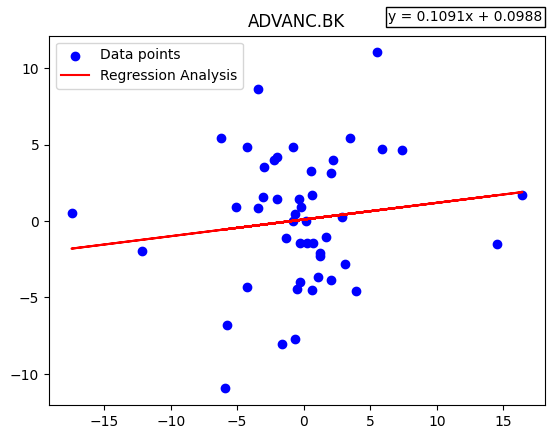

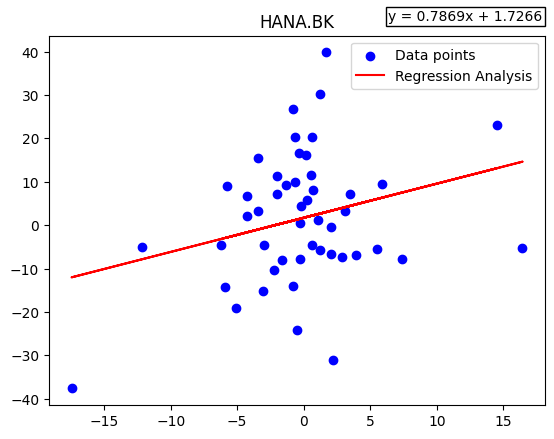

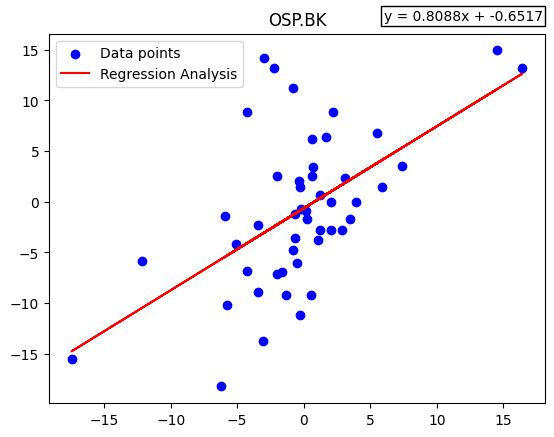

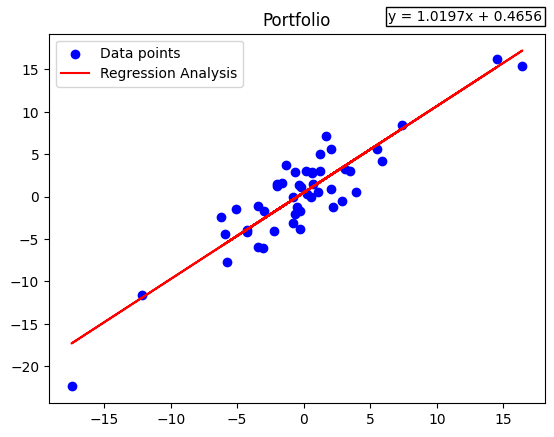

In [55]:
for stock in columns_with_percentage[1::]:
  createRegression(stock)